In [1]:
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import gmplot as gmplot
from xml.etree import ElementTree

In [2]:
#importing cleaned data

home_df = pd.read_csv("./Resources/final_house_data.csv")
home_df = home_df.drop(columns='Unnamed: 0')
home_df["price"] = home_df["price"] 
home_df.head()

,zpid,latitude,longitude,usecode,bathrooms,bedrooms,zipcode,price,lotSizeSqFt,Nearest Station Index,Nearest Station Lat,Nearest Station Lon,Borough,distance_miles
0,31947881,40.780026,-73.916672,SingleFamily,1.0,3,11105,1288952,2500,0,40.775036,-73.912034,Q,0.421744
1,94721614,40.770830,-73.903180,MultiFamily2To4,1.0,1,11105,550596,0,0,40.775036,-73.912034,Q,0.547056
2,94721483,40.770830,-73.903180,MultiFamily2To4,1.0,2,11105,679430,0,0,40.775036,-73.912034,Q,0.547056
3,31947885,40.779837,-73.916406,SingleFamily,1.0,3,11105,1398531,2500,0,40.775036,-73.912034,Q,0.403068
4,31943243,40.768852,-73.900892,Triplex,0.0,0,11105,1293072,2200,0,40.775036,-73.912034,Q,0.723042


# Plotting Station Data in Google Maps
Using this to show the distribution of the stops

In [3]:
gkey = "Insert Key Here"


station_data = pd.read_csv("./Resources/mta_station.csv")
station_location = station_data[["GTFS Latitude","GTFS Longitude"]]

lat = station_data["GTFS Latitude"]
lat_center = station_data["GTFS Latitude"].mean()
long = station_data["GTFS Longitude"]
long_center= station_data["GTFS Longitude"].mean()



In [4]:
# gmap = gmplot.GoogleMapPlotter.from_geocode("New York City")
gmap = gmplot.GoogleMapPlotter(lat_center, long_center,zoom = 12.5,apikey =gkey)
gmap.scatter(lat,long,'red',size = 50, marker= False)

gmap.draw('station_locations.html')
#heatmap of station locations - using this for slides


# Station Data Charts

In [5]:
station_data.head(4)

,Unnamed: 0,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude
0,0,1,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034
1,1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843
2,2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479
3,3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508


In [6]:
#Counting Number of Stations per Borough

borough_mta = station_data[["Borough","Division"]]
station_count =  station_data.groupby(["Borough"])["Borough"].count()

borough_mta.head(3)


#test_y = d["SingleFamily"].groupby('bedrooms')['price'].mean()

x = borough_mta["Borough"].unique()
y = station_count

x

array(['Q', 'M', 'Bk', 'Bx', 'SI'], dtype=object)

In [7]:
station_count

Borough
Bk    169
Bx     70
M     153
Q      84
SI     21
Name: Borough, dtype: int64

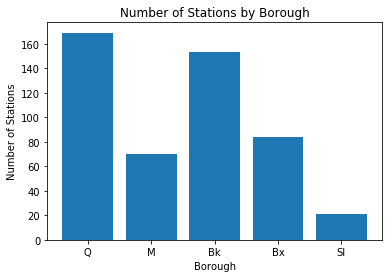

<Figure size 2160x720 with 0 Axes>

In [8]:
#bar
plt.bar(x,y)
plt.title("Number of Stations by Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Stations")


plt.figure(figsize=(30,10))
plt.savefig('./Resources/Images/Number of Stations by Borough.png')


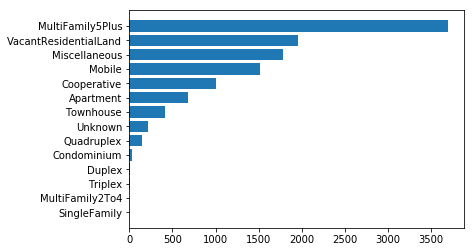

In [9]:
#bar by home types
x_home = home_df["usecode"].unique()
home_count = home_df.groupby(["usecode"])["usecode"].count().sort_values(ascending=True)
y_home = home_count

plt.barh(x_home,y_home)


plt.savefig('./Resources/Images/Number of Homes by Type .png')


# Bar Charts to compare the pricing of various home types in relation to distance

This is being used to look for any difference between each borough to see if Station proximities had any effect.

In [10]:
home_df_cpy = home_df

size_bins = [0, 0.02, 0.04, 0.06, 0.08, 0.10, .12, .14, .16, 0.18, .2, .3]

group_names = ['<0.02', '0.02-0.04', '0.04-0.06', '0.06-0.08', '0.08-0.10',
              '0.10-0.12', '0.12-0.14', '0.14-0.16', '0.16-0.18', '0.20-0.22','>0.22'] 

home_df_cpy['Dist Group'] = pd.cut(home_df_cpy['distance_miles'], size_bins, labels=group_names)

home_df_cpy["Dist Group"].unique()

group1 = home_df_cpy.groupby(['Dist Group','Borough', 'usecode'])
mean_price = group1[['price']].mean().reset_index()
#mean_price

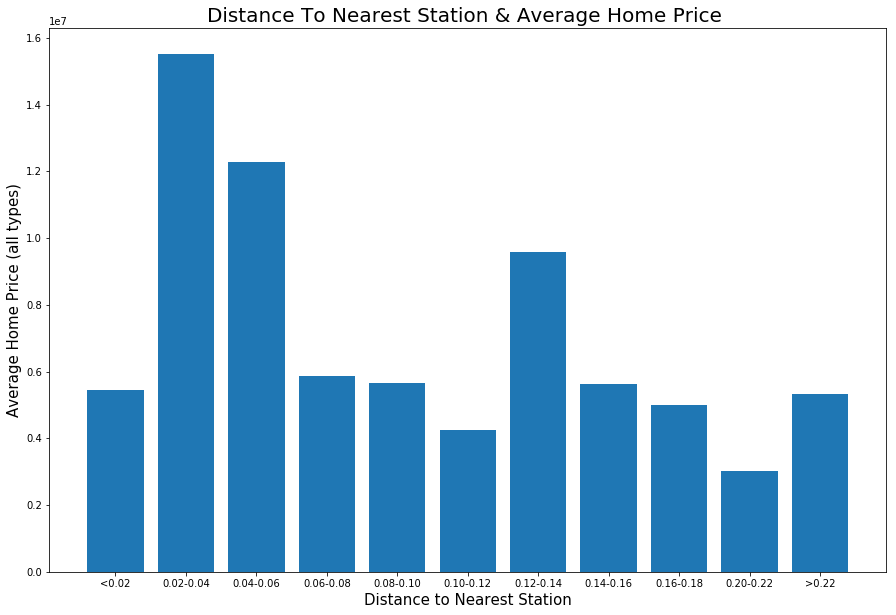

<Figure size 432x288 with 0 Axes>

In [11]:
plt.figure(figsize=(15,10))

plt.bar(mean_price['Dist Group'], mean_price['price'])

plt.xlabel('Distance to Nearest Station', size=15)
plt.ylabel('Average Home Price (all types)', size=15)

plt.title("Distance To Nearest Station & Average Home Price ", size=20)

plt.xticks(rotation=0)


plt.show()

plt.savefig('./Resources/Images/Avg Price vs. Station Distance.png')

In [12]:
mean_price['usecode'].unique()

array(['Apartment', 'Condominium', 'Cooperative', 'Duplex',
       'Miscellaneous', 'Mobile', 'MultiFamily2To4', 'MultiFamily5Plus',
       'Quadruplex', 'SingleFamily', 'Townhouse', 'Triplex', 'Unknown',
       'VacantResidentialLand'], dtype=object)

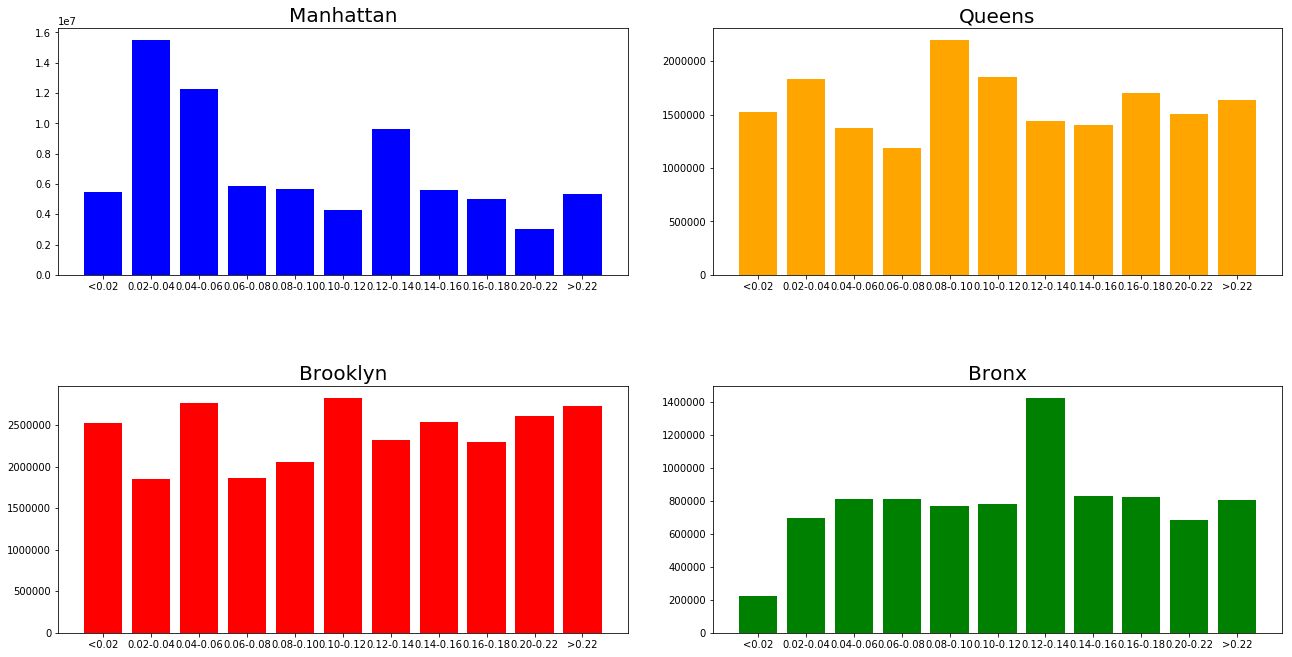

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(20,10))

plt.subplot(221)
plt.bar(mean_price[mean_price['Borough'] == 'M']['Dist Group'], mean_price[mean_price['Borough'] == 'M']['price'], 
        color='blue')
plt.xticks(rotation=0)
plt.title('Manhattan', size=20)

plt.subplot(222)
plt.bar(mean_price[mean_price['Borough'] == 'Q']['Dist Group'], mean_price[mean_price['Borough'] == 'Q']['price'],
       color='orange')
plt.xticks(rotation=0)
plt.title('Queens', size=20)

plt.subplot(223)
plt.bar(mean_price[mean_price['Borough'] == 'Bk']['Dist Group'], mean_price[mean_price['Borough'] == 'Bk']['price'],
       color='red')
plt.xticks(rotation=0)
plt.title('Brooklyn', size=20)


plt.subplot(224)
plt.bar(mean_price[mean_price['Borough'] == 'Bx']['Dist Group'], mean_price[mean_price['Borough'] == 'Bx']['price'],
       color='green')
plt.xticks(rotation=0)
plt.title('Bronx', size=20)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45,
                    wspace=0.15)

plt.show()

plt.savefig('./Resources/Images/Price by Borough Combo.png')

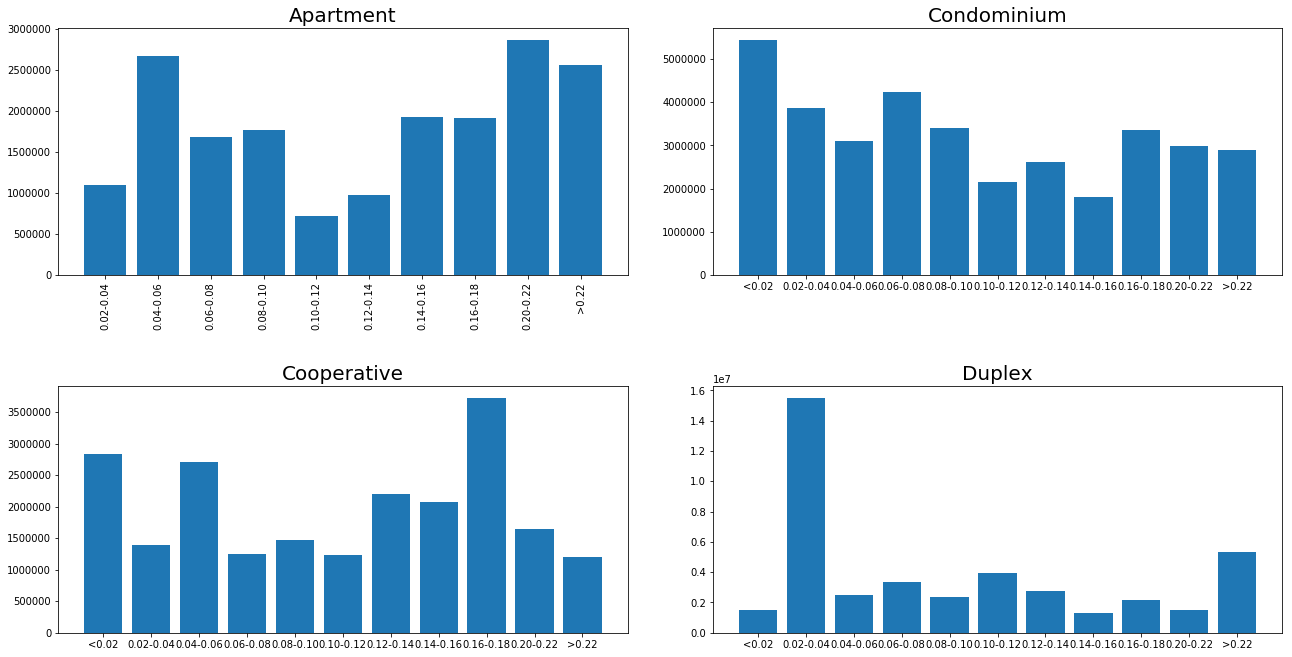

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(20,10))

plt.subplot(221)
plt.bar(mean_price[mean_price['usecode'] == 'Apartment']['Dist Group'], mean_price[mean_price['usecode'] == 'Apartment']['price'])
plt.xticks(rotation=90)
plt.title('Apartment', size=20)

plt.subplot(222)
plt.bar(mean_price[mean_price['usecode'] == 'Condominium']['Dist Group'], mean_price[mean_price['usecode'] == 'Condominium']['price'])
plt.xticks(rotation=0)
plt.title('Condominium', size=20)

plt.subplot(223)
plt.bar(mean_price[mean_price['usecode'] == 'Cooperative']['Dist Group'], mean_price[mean_price['usecode'] == 'Cooperative']['price'])
plt.xticks(rotation=0)
plt.title('Cooperative', size=20)


plt.subplot(224)
plt.bar(mean_price[mean_price['usecode'] == 'Duplex']['Dist Group'], mean_price[mean_price['usecode'] == 'Duplex']['price'])
plt.xticks(rotation=0)
plt.title('Duplex', size=20)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45,
                    wspace=0.15)

plt.show()

plt.savefig('./Resources/Images/Price by Hometype V2.png')

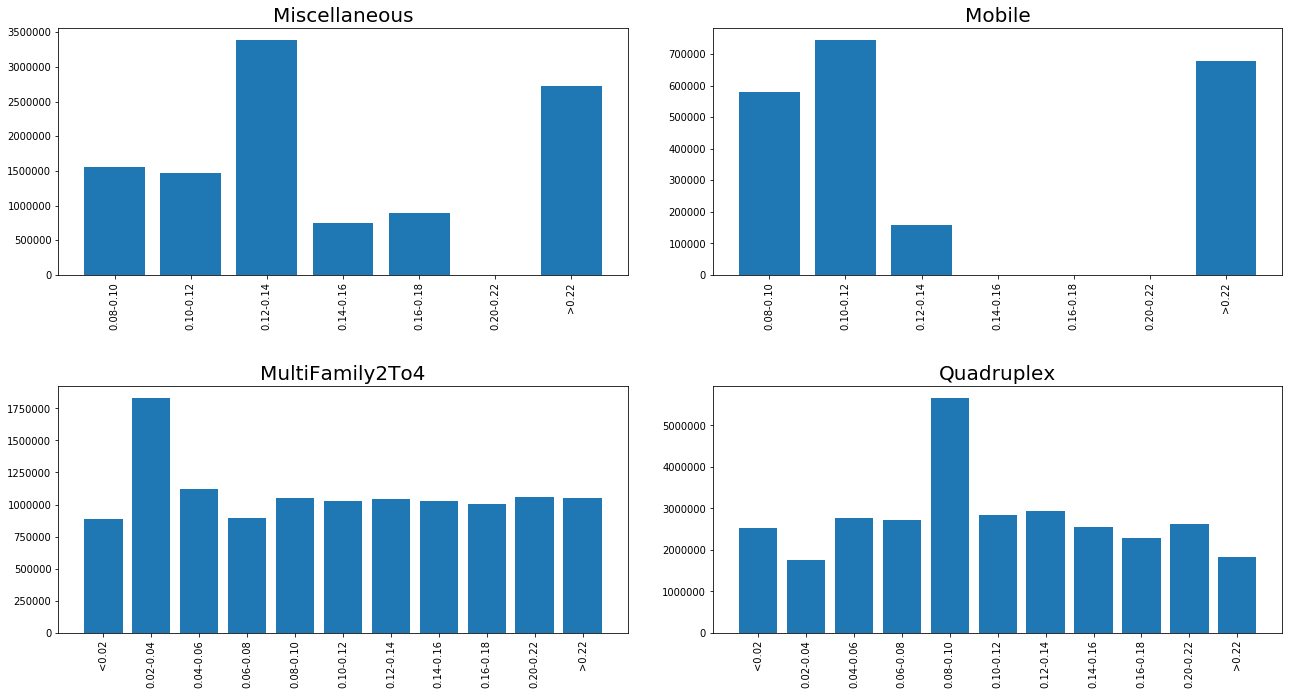

<Figure size 432x288 with 0 Axes>

In [15]:
# print(mean_price['usecode'].unique())
# hometype = input('Choose HomeType: ')
# mean_price = mean_price[mean_price['usecode'] == hometype]


plt.figure(figsize=(20,10))


plt.subplot(221)
plt.bar(mean_price[mean_price['usecode'] == 'Miscellaneous']['Dist Group'], mean_price[mean_price['usecode'] == 'Miscellaneous']['price'])
plt.xticks(rotation=90)
plt.title('Miscellaneous', size=20)


plt.subplot(222)
plt.bar(mean_price[mean_price['usecode'] == 'Mobile']['Dist Group'], mean_price[mean_price['usecode'] == 'Mobile']['price'])
plt.xticks(rotation=90)
plt.title('Mobile', size=20)

plt.subplot(223)
plt.bar(mean_price[mean_price['usecode'] == 'MultiFamily2To4']['Dist Group'], mean_price[mean_price['usecode'] == 'MultiFamily2To4']['price'])
plt.xticks(rotation=90)
plt.title('MultiFamily2To4', size=20)


plt.subplot(224)
plt.bar(mean_price[mean_price['usecode'] == 'Quadruplex']['Dist Group'], mean_price[mean_price['usecode'] == 'Quadruplex']['price'])
plt.xticks(rotation=90)
plt.title('Quadruplex', size=20)



plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45,
                    wspace=0.15)


plt.show()

plt.savefig('./Resources/Images/Price by Hometype v3.png')

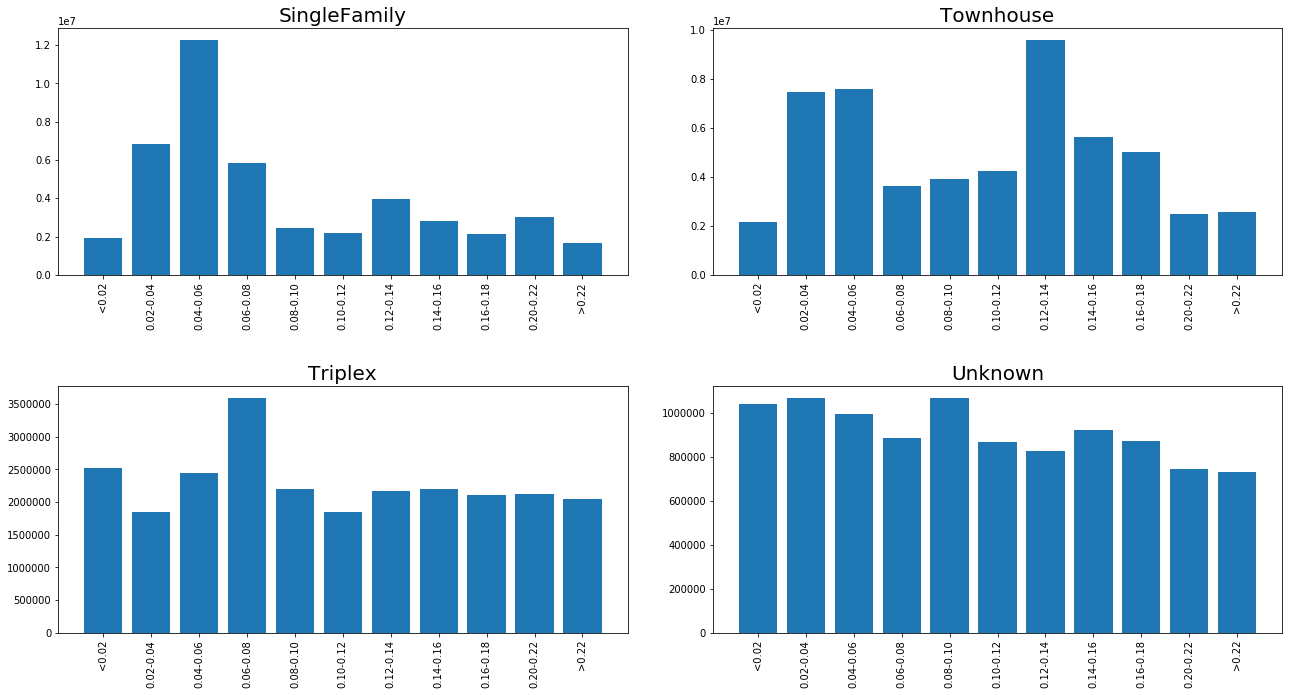

<Figure size 432x288 with 0 Axes>

In [16]:
mean_price['usecode'].unique()

plt.figure(figsize=(20,10))


plt.subplot(221)
plt.bar(mean_price[mean_price['usecode'] == 'SingleFamily']['Dist Group'], mean_price[mean_price['usecode'] == 'SingleFamily']['price'])
plt.xticks(rotation=90)
plt.title('SingleFamily', size=20)


plt.subplot(222)
plt.bar(mean_price[mean_price['usecode'] == 'Townhouse']['Dist Group'], mean_price[mean_price['usecode'] == 'Townhouse']['price'])
plt.xticks(rotation=90)
plt.title('Townhouse', size=20)

plt.subplot(223)
plt.bar(mean_price[mean_price['usecode'] == 'Triplex']['Dist Group'], mean_price[mean_price['usecode'] == 'Triplex']['price'])
plt.xticks(rotation=90)
plt.title('Triplex', size=20)


plt.subplot(224)
plt.bar(mean_price[mean_price['usecode'] == 'Unknown']['Dist Group'], mean_price[mean_price['usecode'] == 'Unknown']['price'])
plt.xticks(rotation=90)
plt.title('Unknown', size=20)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45,
                    wspace=0.15)

plt.show()

plt.savefig('./Resources/Images/Price by Homtype v4.png')

In [17]:
# Creating custom indexs for stations in order to continue to analyze Data

In [18]:
import gmaps
from config import gkey
gmaps.configure(api_key=gkey)


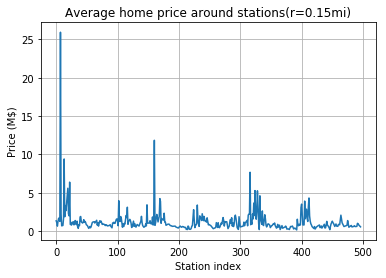

In [19]:
mta = pd.read_csv("Resources/mta_station.csv")
df = pd.read_csv("Resources/final_house_data.csv")
df = df[df['distance_miles']<0.15]
df['price'] = df['price']/1000000

avg_price_per_station = df.groupby('Nearest Station Index')['price'].mean().plot()
avg_price_per_station.set_title("Average home price around stations(r=0.15mi)")
avg_price_per_station.set_xlabel("Station index")
avg_price_per_station.set_ylabel("Price (M$)")
avg_price_per_station.grid()

plt.savefig('./Resources/Images/Price by Station Index.png')

df['price'] = df['price']*1000000

In [20]:
from operator import methodcaller
mta['line'] = list(map(methodcaller("split", " "), mta["Daytime Routes"]))
mta['line count'] =  list(map(len, mta["line"]))
mta['line count'].unique()


from scipy.spatial import distance

matr = distance.cdist(
        mta[['GTFS Latitude', 'GTFS Longitude']],
        mta[['GTFS Latitude', 'GTFS Longitude']],
        metric = 'euclidean')
distance_df = pd.DataFrame(matr, index=mta['Unnamed: 0'], columns=mta['Unnamed: 0'])
arr = distance_df.values
mta['same Index']  = [list(i).index(np.min(i[np.nonzero(i)])) for i in arr]

from math import sin, cos, sqrt, atan2, radians

def convert_latlon(row):
    R = 6373.0
    
    stoplat = radians(row['GTFS Latitude'])
    stoplon = radians(row['GTFS Longitude'])
    
    homelat = radians(mta.loc[row['same Index'], 'GTFS Latitude'])
    homelon = radians(mta.loc[row['same Index'], 'GTFS Longitude'])
    
    dlon = homelon - stoplon
    dlat = homelat - stoplat
    
    a = sin(dlat / 2)**2 + cos(stoplat) * cos(homelat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance_km = R * c
    distance_m = distance_km * 0.621371
    
    return distance_m

mta['near_station_miles'] = mta.apply(convert_latlon, axis=1)


mta['near_station_miles'].describe()

len(mta[mta['near_station_miles'] < 0.125])

station = df.groupby('Nearest Station Index')['price'].mean()
for key, val in station.iteritems():
    print(key, val)

0 1327393.0
1 1090499.875
2 630086.5
3 1251820.3333333333
4 1651735.0
5 1692724.375
6 1257694.7222222222
7 25933803.0
8 2190692.1428571427
9 670736.0
11 722839.0909090909
12 1612973.3333333333
13 9396941.210526315
14 1853545.3333333333
15 3312131.4
16 2644962.3076923075
17 3617937.3333333335
19 5579510.777777778
20 2253448.0
21 1981672.6
22 6374255.0
23 867136.1034482758
24 832296.0
25 766223.75
26 1143633.0
27 946530.1428571428
28 1203731.962962963
29 799360.1
30 952615.4166666666
31 1364809.7391304348
32 934294.0
33 832892.5
34 1283248.4285714286
35 540118.4444444445
36 343536.28571428574
37 826588.0
38 704130.0
39 1831589.3333333333
40 1893741.223880597
41 1190236.0
42 1109087.0
43 1033928.25
44 1134835.0
45 1474583.4
46 1120958.142857143
47 1250900.4666666666
48 1122139.6666666667
49 840590.5
51 688572.5555555555
53 342323.2916666667
54 434712.0
55 581664.1111111111
56 417118.6666666667
57 577983.0
59 1137018.0
62 1213713.0
63 1032184.625
66 1397319.7272727273
67 760070.2647058824


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


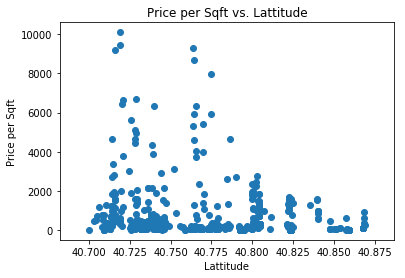

<Figure size 432x288 with 0 Axes>

In [21]:
# Store latitude and longitude in locations
rating = df.groupby('Nearest Station Index')['price'].mean()

locations = []
for key,val in rating.iteritems():
    locations.append([mta.loc[key,'GTFS Latitude'], mta.loc[key, 'GTFS Longitude']])

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=25,
                                 point_radius=0.01)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

M_df = df[(df['lotSizeSqFt'] != 0) & (df['Borough'] == "M")]
M_df['price per sqft'] = M_df['price'] / M_df['lotSizeSqFt']
# df = df[df['price per sqft'] < 6000]
plt.scatter(M_df['latitude'], M_df['price per sqft'])
plt.xlabel("Lattitude")
plt.ylabel("Price per Sqft")
plt.title("Price per Sqft vs. Lattitude")
# z = np.polyfit(M_df['latitude'], M_df['price per sqft'], 3)
# p = np.poly1d(z)
# plt.plot(M_df['latitude'],p(M_df['latitude']),"r--")

plt.show()

plt.savefig('./Resources/Images/Lattitude_sqft.png')


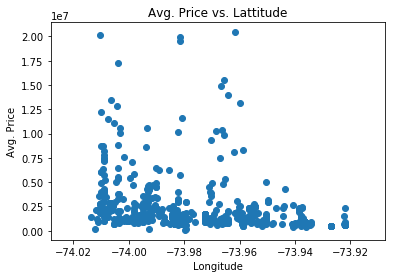

<Figure size 432x288 with 0 Axes>

In [22]:
plt.scatter(M_df['longitude'], M_df['price'])
plt.xlabel("Longitude")
plt.ylabel("Avg. Price")
plt.title("Avg. Price vs. Lattitude")
plt.show()

plt.savefig('./Resources/Images/long_price.png')

In [23]:
borough_gp = df.groupby('Borough')

price_by_borough = borough_gp['price'].count()
price_by_borough


Borough
Bk    1320
Bx     321
M     2411
Q      495
SI      96
Name: price, dtype: int64

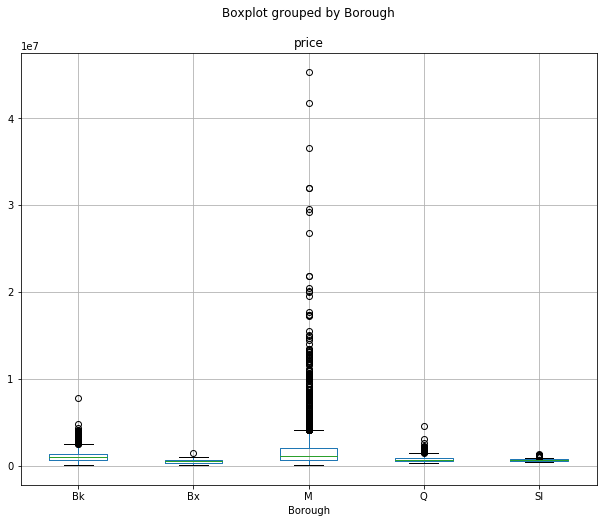

In [24]:
fig, ax = plt.subplots(figsize=(10,8))


plt.savefig('./Resources/Images/Box Plot.png')
plt.suptitle('xxx')


ax = df.boxplot(column=['price'], by='Borough', ax=ax)


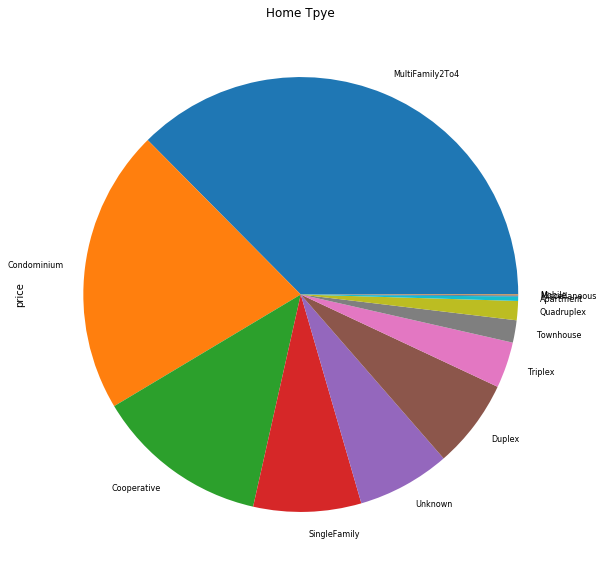

<Figure size 432x288 with 0 Axes>

In [25]:
ax = df.groupby('usecode')['price'].count().sort_values(ascending=False).plot(kind='pie', title ="Home Tpye", figsize=(10, 10), legend=False, fontsize=8)
plt.show()

plt.savefig('./Resources/Images/Price Pie Chart by Home Type.png')

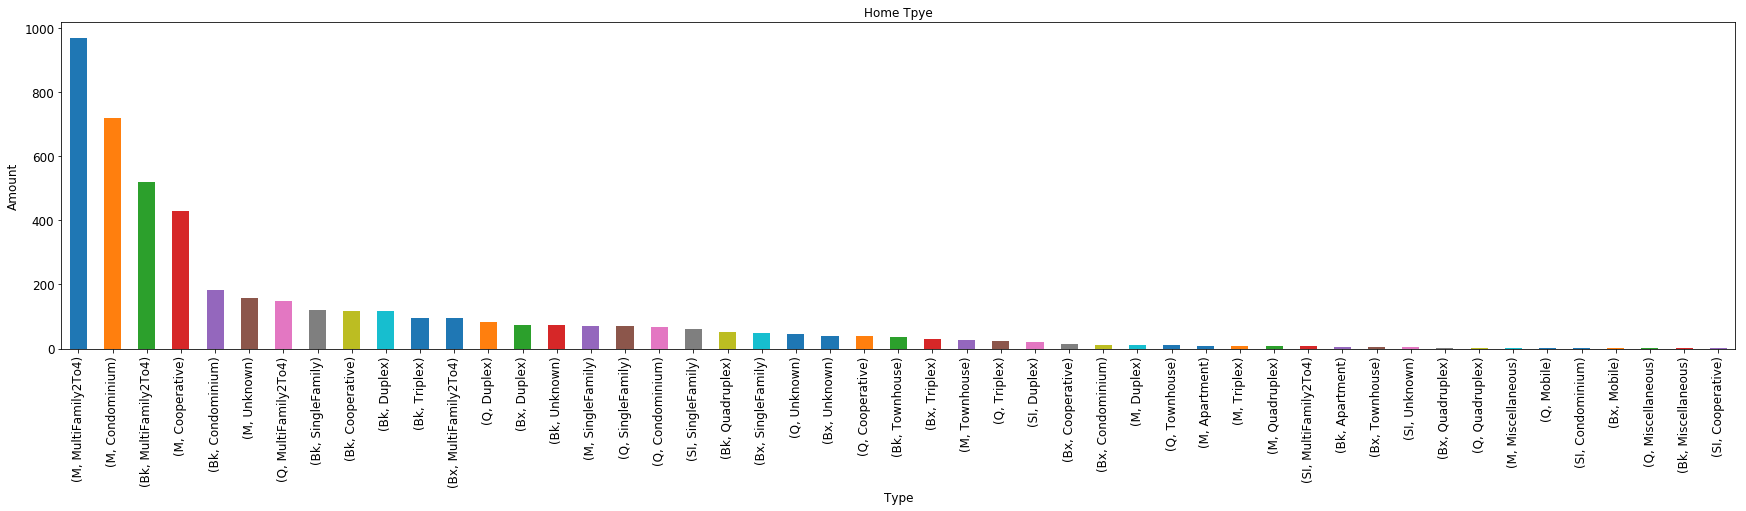

<Figure size 432x288 with 0 Axes>

In [26]:
ax = df.groupby(['Borough', 'usecode'])['price'].count().sort_values(ascending=False).plot(kind='bar', title ="Home Tpye", figsize=(30, 6), legend=False, fontsize=12)
ax.set_xlabel("Type", fontsize=12)
ax.set_ylabel("Amount", fontsize=12)
plt.show()

plt.savefig('./Resources/Images/Price by Borough Bar.png')

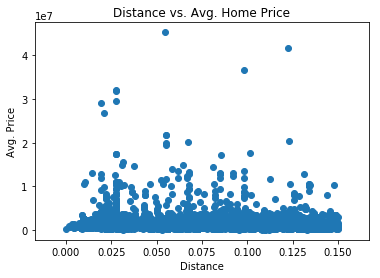

<Figure size 432x288 with 0 Axes>

In [27]:
plt.scatter(df['distance_miles'], df['price'])
plt.xlabel("Distance")
plt.ylabel("Avg. Price")
plt.title("Distance vs. Avg. Home Price")
plt.show()

plt.savefig('./Resources/Images/Distance x Avg Price.png')

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


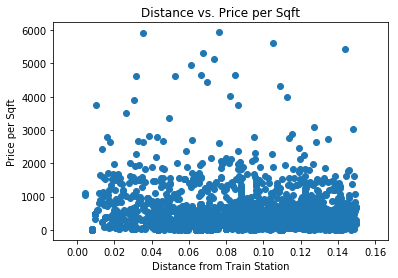

In [28]:
borough_house_type_gp = df.groupby(['Borough', 'usecode'])
borough_house_type_gp['price'].count()

df = df[df['lotSizeSqFt'] != 0]
df['price per sqft'] = df['price'] / df['lotSizeSqFt']
df = df[df['price per sqft'] < 6000]


df.head()
plt.xlabel("Distance from Train Station")
plt.ylabel("Price per Sqft")
plt.title("Distance vs. Price per Sqft")
plt.scatter(df['distance_miles'], df['price per sqft'])

plt.savefig('./Resources/Images/Distance from Train x Avg Price.png')

(87, 16)


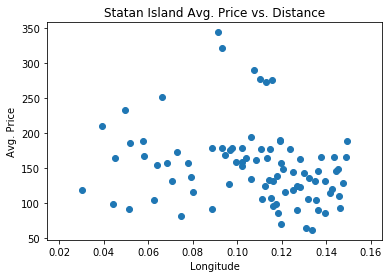

In [31]:
si_home = df[df['Borough'] == 'SI']
print(si_home.shape)
si_home.head()

plt.xlabel("Distance from station")
plt.ylabel("Avg. Price ")
plt.title("Statan Island Avg. Price vs. Distance")

plt.scatter(si_home['distance_miles'], si_home['price per sqft'])


plt.savefig('./Resources/Images/SI Price vs. Distance.png')